In [1]:
import pandas as pd
from typing import List
import glob
import pathlib
import re
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from results import METHOD_NAME, ABLATIONS, BASELINES
plt.rcParams["font.family"] = "Times New Roman"

from IPython.core.debugger import set_trace

%matplotlib inline
%load_ext autoreload
%autoreload 2

#matplotlib.use('TkAgg')

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


FILE_SAVE = '/Users/kimathikaai/scratch/saved/domainbed_results'

# get latex files
latex_files = []
val_latex_files = []
folders = ["33_pacs", "66_pacs"]
for folder in folders:
    latex_files.extend(glob.glob(f'/Users/kimathikaai/scratch/saved/domainbed_results/rerun/{folder}/**/*.tex', recursive=True))
    
print("Number of latex files: ", len(latex_files))
#print("Number of validation latex files: ", len(val_latex_files))
#assert len(latex_files) == len(folders) * 6 * 6
#assert len(val_latex_files) == len(folders) * 6 * 6

# convert latex documents to a pandas dataframe
from results import scrape_latex
data = []
# scrape each latex file
for file in latex_files:
    print('[info] processing: ', file)
    data.extend(scrape_latex(file))

# convert to pandas data frame
df = pd.DataFrame.from_dict(data).sort_values(by=["baseline", "algorithm"], ascending=False).reset_index(drop=True)
df

Number of latex files:  20
[info] processing:  /Users/kimathikaai/scratch/saved/domainbed_results/rerun/33_pacs/domainbed_results_All_33_nacc_macc.tex
[info] processing:  /Users/kimathikaai/scratch/saved/domainbed_results/rerun/33_pacs/domainbed_results_All_33_nacc_accC4.tex
[info] processing:  /Users/kimathikaai/scratch/saved/domainbed_results/rerun/33_pacs/domainbed_results_All_33_nacc_accC5.tex
[info] processing:  /Users/kimathikaai/scratch/saved/domainbed_results/rerun/33_pacs/domainbed_results_All_33_nacc_accC6.tex
[info] processing:  /Users/kimathikaai/scratch/saved/domainbed_results/rerun/33_pacs/domainbed_results_All_33_nacc_accC2.tex
[info] processing:  /Users/kimathikaai/scratch/saved/domainbed_results/rerun/33_pacs/domainbed_results_All_33_nacc_accC3.tex
[info] processing:  /Users/kimathikaai/scratch/saved/domainbed_results/rerun/33_pacs/domainbed_results_All_33_nacc_accC1.tex
[info] processing:  /Users/kimathikaai/scratch/saved/domainbed_results/rerun/33_pacs/domainbed_resu

,dataset,overlap,algorithm,selection_metric,evaluation_metric,selection_value,evaluation_value,selection_std,evaluation_std,baseline
0,PACS,33,Transfer,nacc,macc,None,48.6,None,0.7,1
1,PACS,33,Transfer,nacc,accC4,None,82.7,None,2.4,1
2,PACS,33,Transfer,nacc,accC5,None,48.4,None,1.1,1
3,PACS,33,Transfer,nacc,accC6,None,15.5,None,0.3,1
4,PACS,33,Transfer,nacc,accC2,None,75.7,None,1.8,1
...,...,...,...,...,...,...,...,...,...,...
215,PACS,66,FOND,nacc,accC5,None,93.9,None,1.4,0
216,PACS,66,FOND,nacc,accC1,None,21.5,None,2.5,0
217,PACS,66,FOND,nacc,accC0,None,20.6,None,2.7,0
218,PACS,66,FOND,nacc,accC2,None,85.1,None,0.6,0


## Validate results with domainbed_results

In [2]:
data = df.loc[(df['evaluation_metric'].isin(['nacc']))&(df['selection_metric'].isin(['nacc']))&(df['dataset'].isin(['PACS', 'OfficeHome', 'VLCS']))&(df['overlap'].isin(['33', '66']))][df['algorithm'].isin(ABLATIONS+BASELINES)].sort_values(by='algorithm', ascending=True).reset_index(drop=True)
pd.pivot_table(data=data, values=['evaluation_value', 'evaluation_std'], index=['selection_metric', 'evaluation_metric','algorithm'], columns=['dataset', 'overlap'], aggfunc=np.mean)

/var/folders/kr/gtghwjcs55q1lrp82b0qv62h0000gn/T/ipykernel_75980/2864032026.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df.loc[(df['evaluation_metric'].isin(['nacc']))&(df['selection_metric'].isin(['nacc']))&(df['dataset'].isin(['PACS', 'OfficeHome', 'VLCS']))&(df['overlap'].isin(['33', '66']))][df['algorithm'].isin(ABLATIONS+BASELINES)].sort_values(by='algorithm', ascending=True).reset_index(drop=True)


evaluation_std       \
dataset                                                PACS        
overlap                                                  33   66   
selection_metric evaluation_metric algorithm                       
nacc             nacc              ARM                  1.3  2.9   
                                   CAD                  0.9  0.7   
                                   CORAL                0.8  1.0   
                                   ERM                  0.5  2.2   
                                   FOND                 1.4  1.1   
                                   FOND\F               0.3  0.7   
                                   FOND\FB              0.8  0.8   
                                   FOND\FBA             1.0  0.7   
                                   MLDG                 0.1  0.5   
                                   SelfReg              0.4  1.2   
                                   Transfer             1.8  1.6   

                                             evaluation_value        
dataset                                                  PACS        
overlap                                                    33    66  
selection_metric evaluation_metric algorithm                         
nacc             nacc              ARM                   36.8  16.2  
                                   CAD                   33.0  13.1  
                                   CORAL                 33.3  13.7  
                                   ERM                   36.5  14.5  
                                   FOND                  36.7  20.5  
                                   FOND\F                34.5  16.0  
                                   FOND\FB               33.8  16.1  
                                   FOND\FBA              34.4  14.0  
                                   MLDG                  38.0  13.8  
                                   SelfReg               32.4  13.4  
                                   Transfer              36.4  16.0

## Per-Class Accuracy 33-66

/var/folders/kr/gtghwjcs55q1lrp82b0qv62h0000gn/T/ipykernel_75980/3506883941.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Low', 'High'])


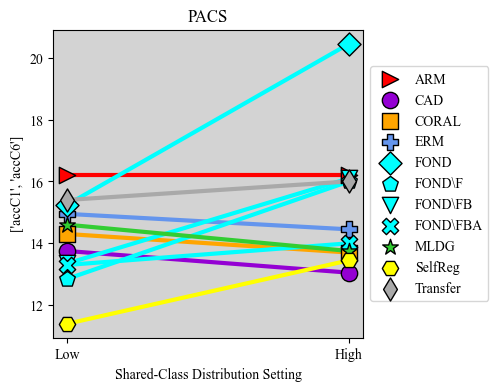

In [35]:
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MaxNLocator
import itertools
from results import ABLATIONS, ABLATION_MARKERS, BASELINE_MARKERS, BASE_COLORS

def plot_results(df, selec_metric, eval_metric, dataset):
    fig, ax = plt.subplots(figsize=(4,4))
    
    data = df.loc[
        (df['dataset'] == dataset) &
        (df['selection_metric'] == selec_metric) &
        (df['evaluation_metric'].isin(eval_metric))
    ].sort_values(by=['algorithm'], ascending=False)
    
    # split data by class-shared setting
    data = data.groupby(["algorithm", 'overlap']).mean(numeric_only=True)
    data_value = data['evaluation_value'].unstack().reset_index(names="algorithm")
    
    i_p = 0
    i_b = 0
    for i, row in data_value.iterrows():
        if row["algorithm"] in ABLATIONS:
            color = "cyan"
            marker = ABLATION_MARKERS[i_p]
            i_p += 1
        else:
            color = BASE_COLORS[i_b]
            marker = BASELINE_MARKERS[i_b]
            i_b += 1
            
        ax.plot(['33', '66'], [row['33'], row['66']], label='_nolegend_', color=color, zorder=10, linewidth=3)
        ax.scatter(['33', '66'], [row['33'], row['66']], label=row['algorithm'], 
                   color=color, marker=marker, edgecolor="black", zorder=15, 
                   s=mpl.rcParams['lines.markersize']**2.75)


        
    ax.set_title(dataset)
    ax.set_ylabel(str(eval_metric))
    ax.set_xlabel('Shared-Class Distribution Setting')
    ax.set_xticklabels(['Low', 'High'])
    ax.legend(loc="center left", bbox_to_anchor=(1,0.5))
    ax.set_facecolor('lightgrey')

plot_results(df=df, selec_metric="nacc", eval_metric=["accC1", "accC6"], dataset="PACS")
